## Dataset

Our datasets contain two files as follows:
* hedge_fund_raw: includes hedge fund index returns from various funds from Jan 1997 to Aug 2020
* prices: includes security prices from Yahoo Finance. The first two columns show the date and data feature while the rest of the columns are corresponding values from 20 stocks between Jan 2000 and Mar 2022

## Import Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import hedge_fund_raw dataset
df_1 = pd.read_csv('./Datasets/hedge_fund_raw.csv', delimiter=";", index_col=0, parse_dates=True, header=0)
df_1.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,1.19%,3.93%,1.78%,7.91%,1.89%,2.13%,1.91%,5.73%,2.81%,1.50%,1.80%,-1.66%,3.17%
1997-02-28,1.23%,2.98%,1.22%,5.25%,1.01%,0.84%,1.22%,1.75%,-0.06%,0.34%,1.18%,4.26%,1.06%
1997-03-31,0.78%,-0.21%,-0.12%,-1.20%,0.16%,-0.23%,1.09%,-1.19%,-0.84%,0.60%,0.10%,7.78%,-0.77%
1997-04-30,0.86%,-1.70%,0.30%,1.19%,1.19%,-0.05%,1.30%,1.72%,0.84%,-0.01%,1.22%,-1.29%,0.09%
1997-05-31,1.56%,-0.15%,2.33%,3.15%,1.89%,3.46%,1.18%,1.08%,3.94%,1.97%,1.73%,-7.37%,2.75%


In [2]:
# Import prices dataset
df_2 = pd.read_excel('./Datasets/prices.xlsx')
df_2.head()

,Date,Feature,AAPL,AGG,AMD,AMZN,BABA,EFA,EMB,FB,...,GOVT,HYG,LQD,MSFT,NVDA,QQQ,SPY,TSLA,^GSPC,^RUA
0,1999-12-31,Adj Close,0.786033,NaN,14.46875,76.1250,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,36.886776,0.898186,79.050415,97.509407,NaN,1469.250000,793.309998
1,1999-12-31,Close,0.917969,NaN,14.46875,76.1250,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.375000,0.977865,91.375000,146.875000,NaN,1469.250000,793.309998
2,1999-12-31,High,0.918527,NaN,14.46875,79.3750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.875000,0.979167,93.187500,147.500000,NaN,1472.420044,794.380005
3,1999-12-31,Low,0.888393,NaN,14.00000,76.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.125000,0.960938,91.375000,146.250000,NaN,1458.189941,789.200012
4,1999-12-31,Open,0.901228,NaN,14.21875,79.3125,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.750000,0.964193,92.625000,146.843750,NaN,1464.469971,790.190002


In [3]:
# Get general descriptive statistics about the first dataset
df_1.describe()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
count,284,284,284,284,284,284,284,284,284,284,284,282,284
unique,203,252,217,238,162,219,175,213,233,194,195,255,212
top,0.60%,-0.16%,0.82%,1.60%,0.58%,0.90%,0.36%,0.64%,0.09%,0.61%,0.31%,0.56%,1.71%
freq,5,3,5,3,7,3,6,5,3,4,6,3,4


In [4]:
# Get general descriptive statistics for the second dataset
df_2.describe()

,AAPL,AGG,AMD,AMZN,BABA,EFA,EMB,FB,GLD,GOOG,GOVT,HYG,LQD,MSFT,NVDA,QQQ,SPY,TSLA,^GSPC,^RUA
count,3.358200e+04,2.794800e+04,3.358200e+04,3.358200e+04,1.137000e+04,3.108000e+04,2.156400e+04,1.489200e+04,2.622000e+04,2.660400e+04,1.524600e+04,2.262000e+04,2.971200e+04,3.358200e+04,3.358200e+04,3.358200e+04,3.358200e+04,1.775400e+04,3.358200e+04,3.340800e+04
mean,7.092113e+07,3.482710e+05,4.971044e+06,1.051664e+06,3.077062e+06,2.729385e+06,3.087818e+05,5.151716e+06,1.629913e+06,1.065199e+06,3.673347e+05,1.663850e+06,6.214415e+05,8.838178e+06,1.054581e+07,1.157239e+07,1.832772e+07,5.218376e+06,5.360648e+08,2.980603e+03
std,2.243456e+08,1.299314e+06,1.662679e+07,3.119105e+06,8.734304e+06,8.107067e+06,1.149299e+06,1.608113e+07,4.638790e+06,3.966016e+06,1.938161e+06,6.157541e+06,2.608380e+06,2.348573e+07,2.982747e+07,3.316595e+07,5.650241e+07,1.632525e+07,1.347161e+09,8.010903e+04
min,2.006131e-01,5.635304e+01,0.000000e+00,5.510000e+00,5.720000e+01,1.724139e+01,0.000000e+00,1.755000e+01,4.102000e+01,4.780083e+01,0.000000e+00,2.783002e+01,4.392361e+01,1.148797e+01,5.641227e-01,1.735432e+01,5.263653e+01,2.996000e+00,6.667900e+02,0.000000e+00
25%,2.619602e+00,1.009800e+02,6.430000e+00,5.000000e+01,1.039020e+02,5.005263e+01,1.022237e+02,8.163750e+01,1.051375e+02,2.657377e+02,2.471000e+01,8.338000e+01,1.059075e+02,2.659000e+01,3.034375e+00,4.195000e+01,1.163825e+02,3.468700e+01,1.216485e+03,5.879000e+02
50%,1.880500e+01,1.080800e+02,1.438000e+01,2.703250e+02,1.746400e+02,6.105000e+01,1.098400e+02,1.681550e+02,1.245900e+02,5.746517e+02,2.532000e+01,8.754000e+01,1.147000e+02,3.521875e+01,5.053758e+00,8.399000e+01,1.552200e+02,5.241000e+01,1.598415e+03,7.623200e+02
75%,6.695625e+01,1.133900e+02,4.548000e+01,1.942908e+03,2.298800e+02,7.372250e+01,1.154800e+02,2.787700e+02,1.671950e+02,1.467475e+03,2.684000e+01,9.408000e+01,1.278400e+02,1.541464e+02,6.537800e+01,2.033850e+02,2.996244e+02,6.225225e+02,3.007943e+03,1.218747e+03
max,7.421641e+09,2.496050e+07,3.250584e+08,1.043292e+08,2.718794e+08,1.223420e+08,2.199620e+07,5.735764e+08,9.380420e+07,8.254163e+07,7.420880e+07,9.747260e+07,5.358000e+07,5.910522e+08,9.230856e+08,6.167723e+08,8.710263e+08,3.046940e+08,1.145623e+10,5.673400e+06


In [5]:
# Get info about number of columns, column data types
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284 entries, 1997-01-31 to 2020-08-31
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Convertible Arbitrage   284 non-null    object
 1   CTA Global              284 non-null    object
 2   Distressed Securities   284 non-null    object
 3   Emerging Markets        284 non-null    object
 4   Equity Market Neutral   284 non-null    object
 5   Event Driven            284 non-null    object
 6   Fixed Income Arbitrage  284 non-null    object
 7   Global Macro            284 non-null    object
 8   Long/Short Equity       284 non-null    object
 9   Merger Arbitrage        284 non-null    object
 10  Relative Value          284 non-null    object
 11  Short Selling           282 non-null    object
 12  Funds Of Funds          284 non-null    object
dtypes: object(13)
memory usage: 31.1+ KB


In [6]:
# Get info about number of columns, column data types
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33582 entries, 0 to 33581
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     33582 non-null  datetime64[ns]
 1   Feature  33582 non-null  object        
 2   AAPL     33582 non-null  float64       
 3   AGG      27948 non-null  float64       
 4   AMD      33582 non-null  float64       
 5   AMZN     33582 non-null  float64       
 6   BABA     11370 non-null  float64       
 7   EFA      31080 non-null  float64       
 8   EMB      21564 non-null  float64       
 9   FB       14892 non-null  float64       
 10  GLD      26220 non-null  float64       
 11  GOOG     26604 non-null  float64       
 12  GOVT     15246 non-null  float64       
 13  HYG      22620 non-null  float64       
 14  LQD      29712 non-null  float64       
 15  MSFT     33582 non-null  float64       
 16  NVDA     33582 non-null  float64       
 17  QQQ      33582 non-null  float6

**Observation:** The two datasets seem relatively clean with no missing/null values. Since all columns in the first dataset are currently in 'object' datatype, I would convert all numeric columns into float and get rid of the '%' mark in order to better perform calculations on these columns.

In [7]:
# Convert columns into float and get rid of '%' mark
df_1['Convertible Arbitrage'] = df_1['Convertible Arbitrage'].str.rstrip('%').astype('float') / 100.0
df_1['CTA Global'] = df_1['CTA Global'].str.rstrip('%').astype('float') / 100.0
df_1['Distressed Securities'] = df_1['Distressed Securities'].str.rstrip('%').astype('float') / 100.0
df_1['Emerging Markets'] = df_1['Emerging Markets'].str.rstrip('%').astype('float') / 100.0
df_1['Equity Market Neutral'] = df_1['Equity Market Neutral'].str.rstrip('%').astype('float') / 100.0
df_1['Event Driven'] = df_1['Event Driven'].str.rstrip('%').astype('float') / 100.0
df_1['Fixed Income Arbitrage'] = df_1['Fixed Income Arbitrage'].str.rstrip('%').astype('float') / 100.0
df_1['Global Macro'] = df_1['Global Macro'].str.rstrip('%').astype('float') / 100.0
df_1['Long/Short Equity'] = df_1['Long/Short Equity'].str.rstrip('%').astype('float') / 100.0
df_1['Merger Arbitrage'] = df_1['Merger Arbitrage'].str.rstrip('%').astype('float') / 100.0
df_1['Relative Value'] = df_1['Relative Value'].str.rstrip('%').astype('float') / 100.0
df_1['Short Selling'] = df_1['Short Selling'].str.rstrip('%').astype('float') / 100.0
df_1['Funds Of Funds'] = df_1['Funds Of Funds'].str.rstrip('%').astype('float') / 100.0

In [8]:
# Confirm with the first 5 rows that '%' has been eliminated
df_1.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02-28,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03-31,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04-30,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05-31,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


## 1. Hedge Fund Dataset Analysis

### A. Skewness

Based on the context of hedge fund management, it is critical to consider skewness of the first dataset. Intuitively,
a negative skew means you would get more negative returns than expected if the returns were distributed with the normal
distribution. Hence, if the returns are negatively skewed, the expected value (i.e. the mean of returns) is lesser than
the median and vice versa (Regenstein 2017).

In [9]:
# Get mean and median returns of all hedge fund in the first dataset
pd.concat([df_1.mean(), df_1.median(), df_1.mean() > df_1.median()], axis=1)

,0,1,2
Convertible Arbitrage,0.005599,0.00655,False
CTA Global,0.004070,0.00160,True
Distressed Securities,0.006380,0.00860,False
Emerging Markets,0.006380,0.00965,False
Equity Market Neutral,0.004281,0.00470,False
Event Driven,0.006095,0.00840,False
Fixed Income Arbitrage,0.004333,0.00550,False
Global Macro,0.005407,0.00420,True
Long/Short Equity,0.006300,0.00815,False
Merger Arbitrage,0.005137,0.00585,False


**Observation:** At first glance, it seems that the majority of our hedge funds demonstrate negative skewness, meaning
    that their returns were performing worse than expected, with mean way below our median. The function below would
    attempt to quantify skewness of all hedge funds and confirm our aforementioned hypothesis.

In [10]:
def skewness(r):
    """
    Calculate skewness of the dataset
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [11]:
# Calculate skewness and sort its values
skewness(df_1).sort_values()

Fixed Income Arbitrage   -3.748318
Convertible Arbitrage    -2.611642
Merger Arbitrage         -2.341507
Event Driven             -2.119776
Relative Value           -2.070824
Equity Market Neutral    -1.954866
Distressed Securities    -1.769373
Emerging Markets         -1.220970
Funds Of Funds           -0.637471
Long/Short Equity        -0.550514
CTA Global                0.173494
Short Selling             0.766402
Global Macro              0.921556
dtype: float64

**Insights and Recommendation:** 'Fixed Income Arbitrage' has the highest negative skewness, denoting that this fund is at risk of making very
    large losses and hence, would be considered risky for investors. Meanwhile, portfolios such as CTA Global, Short Selling and Global Macro have seen considerable positive returns, implying to have numerous significant positive returns and a few small negative returns. It is recommended that risky profiles such as 'Fixed Income Arbitrage' would need to be diversified with positvely skewed portfolios such as 'Global Macro' in order to reduce exposed risks.

### B. Kurtosis

Similar to skewness of portfolios, kurtosis is an important concept that measures the degree to which fund returns appear. A normal distribution has a kurtosis of 3, which follows the fact that a normal distribution does hsave some of its mass in its tail. We would use this as a benchmark to evaluate the riskiness of different portfolios. To be more specific, a distribution with greater than 3 kurtosis means that our portfolio might be ar risk of a rare but very dramatic downside (Regenstein 2018).

In [12]:
def kurtosis(r):
    """
    Computes the kurtosis of the supplied DataFrame
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [13]:
# Calculate kurtosis of all portfolios
kurtosis(df_1).sort_values()

CTA Global                 3.005709
Long/Short Equity          4.983220
Global Macro               5.697053
Short Selling              6.395169
Funds Of Funds             7.589269
Emerging Markets           8.979894
Distressed Securities     10.961853
Relative Value            13.023207
Event Driven              13.958533
Equity Market Neutral     15.632516
Merger Arbitrage          18.306067
Convertible Arbitrage     21.574536
Fixed Income Arbitrage    27.846536
dtype: float64

**Insight:** 'Fixed Income Arbitrage', 'Convertible Arbitrage' and 'Merger Arbitrage' are the top 3 highest kurtosis, meaning that these 3 funds have observed very large negative returns the majority of the time (between Jan 1997 and Aug 2020). This once again confirms our hypothesis that these 3 funds are highly risky. Meanwhile, 'CTA Global' seems to be the most stable, with skewness close to almost 0 (0.173) and kurtosis close to 3, implying a Gaussian (or normal) distribution of returns.

### C. Semideviation

Further zooming into fluctuations of returns on investment, I would like to examine semi-deviation of all hedge funds, which would reveal the worst-case performance expected from a risky investment. Semi-deviation would then be compared to normal risk metric such as standard deviation.

In [14]:
# Calculate the standard deviation
std = df_1.std(ddof=0)
print(std.sort_values())

Equity Market Neutral     0.008220
Merger Arbitrage          0.010815
Fixed Income Arbitrage    0.011581
Relative Value            0.011946
Global Macro              0.014536
Funds Of Funds            0.015996
Convertible Arbitrage     0.016842
Distressed Securities     0.018079
Event Driven              0.018708
Long/Short Equity         0.020634
CTA Global                0.022820
Emerging Markets          0.032866
Short Selling             0.046286
dtype: float64


In [15]:
# Calculate the semi-deviation for which returns are negative values
semi_std = df_1[df_1<0].std(ddof=0)
print(semi_std.sort_values())

Global Macro              0.006725
Equity Market Neutral     0.009406
CTA Global                0.012259
Merger Arbitrage          0.012443
Funds Of Funds            0.013260
Relative Value            0.013551
Long/Short Equity         0.015355
Distressed Securities     0.017640
Fixed Income Arbitrage    0.017782
Event Driven              0.019643
Convertible Arbitrage     0.020335
Short Selling             0.027061
Emerging Markets          0.028846
dtype: float64


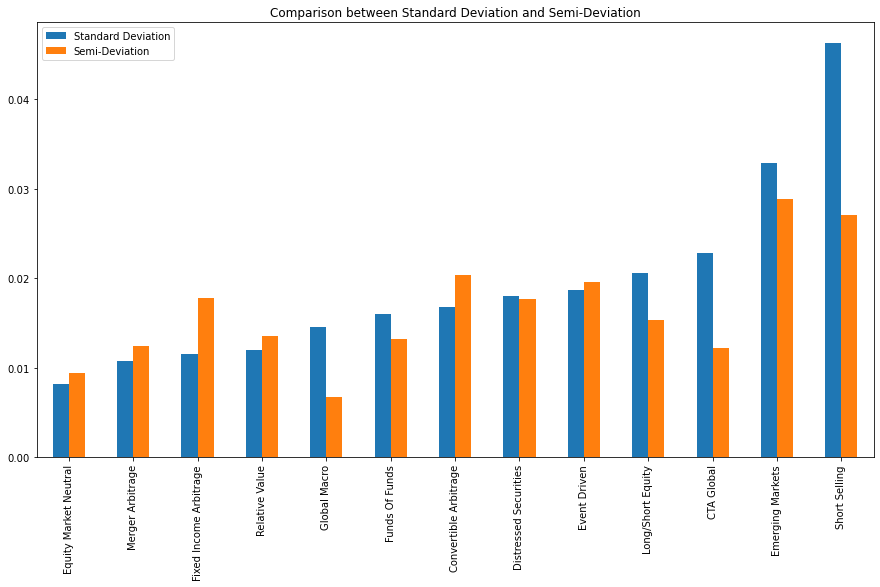

In [16]:
comparison = pd.concat([std.sort_values(), semi_std.sort_values()], axis=1)
comparison.columns = ['Standard Deviation', 'Semi-Deviation']
comparison.plot.bar(title="Comparison between Standard Deviation and Semi-Deviation", figsize=(15,8))
plt.show()

**Insight:** While it is clear that 'Short Selling' and 'CTA Global' were among the top 3 funds that experience highest standard deviation, meaning that these two funds have the highest probability to deviate from its expected returns, output from skewness and kurtosis have proven that these two funds yield much more positive returns than losses. The higher the risks, the higher the returns. Indeed, 'Short Selling' and 'CTA Global' seem to be performing quite well in comparison to funds such as 'Equity Market Neutral', 'Merger Arbitrage' or 'Fixed Income Arbitrage' which have lower deviation from expected returns, but have way more negative returns distribution.

### D. Monthly Value At Risk

Value at Risk, or VaR, represents the potential loss in value of a risky investment over a defined period of time with a given confidence interval. I would be calculating historical VaR, which is based on our dataset from 1997 to 2020. 

In [17]:
# Set VaR for each index at 95% confidence level
np.percentile(df_1, 5, axis=0)

array([-0.01569 , -0.03157 , -0.01987 , -0.042455, -0.00854 , -0.025655,
       -0.007805, -0.014985, -0.026355, -0.010455, -0.01171 ,       nan,
       -0.020455])

**Note:** I notice that the calculation method for np.percentile would yield 'nan' values because np.percentile would treat NaN (or null value) as very high/infinite numbers. Since our datasets have a number of 'NaN' values, I would change the method from np.percentile() to np.nanpercentile() to overcome this problem. The results are the same, even with columns that have high number of NaN. 

In [18]:
np.nanpercentile(df_1, 5, axis=0)

array([-0.01569 , -0.03157 , -0.01987 , -0.042455, -0.00854 , -0.025655,
       -0.007805, -0.014985, -0.026355, -0.010455, -0.01171 , -0.067165,
       -0.020455])

In [19]:
def var(r, level=5):
    """
    Calculate Value at Risk with 95% confidence interval
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var, level=level)
    
    elif isinstance(r, pd.Series):
        return -np.nanpercentile(r, level)
    
    else:
        raise TypeError("Error type: Must be either Series or DataFrame")

In [20]:
# Calculate vaR at 95%
var(df_1)

Convertible Arbitrage     0.015690
CTA Global                0.031570
Distressed Securities     0.019870
Emerging Markets          0.042455
Equity Market Neutral     0.008540
Event Driven              0.025655
Fixed Income Arbitrage    0.007805
Global Macro              0.014985
Long/Short Equity         0.026355
Merger Arbitrage          0.010455
Relative Value            0.011710
Short Selling             0.067165
Funds Of Funds            0.020455
dtype: float64

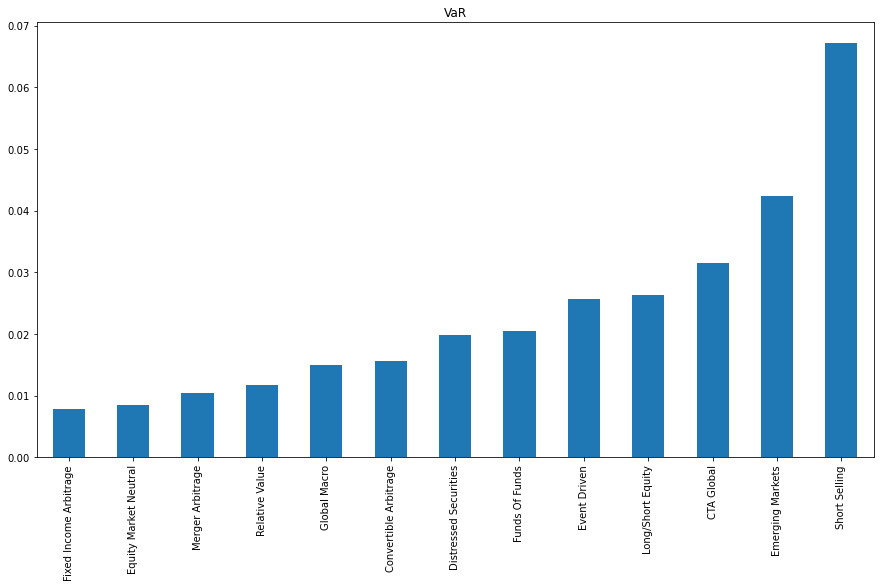

In [21]:
var(df_1).sort_values().plot.bar(title="VaR", figsize=(15,8))
plt.show()

**Insight:** Similar to our previous observations, as 'Short Selling' has the highest standard deviation (or even highest semideviation), it is clear that it would also yield highest (potential) losses. At 95% confident interval, there is a 5% probability of lossing more than 6.71% of our investment on the fund. Assuming that we are investing 1 million USD on the fund, this would translate into USD 67,100 of losses for a particular month.

## 2. Security Price Analysis

### A. Exploratory Data Analysis

#### A.1. Closing Price

**Assumption:** Since the security price dataset has many different price features (Adjusted Closing Price, Closing Price, Opening Price, High Price, Low Price & Volume), I would assume that we are only performing exploratory data analysis on **'Closing Price' and 'Volume'** since it already took into account daily volatability of the stock throughout the trading date.

In [22]:
# Get Closing Prices
df_2[df_2.Feature == 'Close']

,Date,Feature,AAPL,AGG,AMD,AMZN,BABA,EFA,EMB,FB,...,GOVT,HYG,LQD,MSFT,NVDA,QQQ,SPY,TSLA,^GSPC,^RUA
1,1999-12-31,Close,0.917969,NaN,14.468750,76.125000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.375000,0.977865,91.375000,146.875000,NaN,1469.250000,793.309998
7,2000-01-03,Close,0.999442,NaN,15.500000,89.375000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.281250,0.975260,94.750000,145.437500,NaN,1455.219971,786.200012
13,2000-01-04,Close,0.915179,NaN,14.625000,81.937500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56.312500,0.949219,88.250000,139.750000,NaN,1399.420044,755.799988
19,2000-01-05,Close,0.928571,NaN,15.000000,69.750000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56.906250,0.917969,86.000000,140.000000,NaN,1402.109985,757.090027
25,2000-01-06,Close,0.848214,NaN,16.000000,65.562500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,55.000000,0.858073,80.093750,137.750000,NaN,1403.449951,756.729980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33553,2022-03-23,Close,170.210007,107.190002,113.919998,3268.159912,117.239998,73.040001,95.750000,213.460007,...,24.959999,81.739998,120.169998,299.489990,256.339996,351.829987,443.799988,999.109985,4456.240234,2590.899902
33559,2022-03-24,Close,174.070007,106.949997,120.529999,3272.989990,115.150002,73.720001,96.129997,219.570007,...,24.910000,81.910004,120.220001,304.100006,281.500000,359.649994,450.489990,1013.919983,4520.160156,2626.909912
33565,2022-03-25,Close,174.720001,106.099998,119.669998,3295.469971,112.989998,73.760002,95.910004,221.820007,...,24.709999,81.320000,119.269997,303.679993,276.920013,359.350006,452.690002,1010.640015,4543.060059,2637.370117
33571,2022-03-28,Close,175.600006,106.360001,120.239998,3379.810059,115.089996,73.519997,96.839996,223.589996,...,24.760000,81.830002,119.930000,310.700012,282.190002,364.910004,455.910004,1091.839966,4540.910156,2655.489990


In [23]:
df_close_price = df_2[df_2.Feature == 'Close']
df_close_price.head()

,Date,Feature,AAPL,AGG,AMD,AMZN,BABA,EFA,EMB,FB,...,GOVT,HYG,LQD,MSFT,NVDA,QQQ,SPY,TSLA,^GSPC,^RUA
1,1999-12-31,Close,0.917969,NaN,14.46875,76.1250,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.37500,0.977865,91.37500,146.8750,NaN,1469.250000,793.309998
7,2000-01-03,Close,0.999442,NaN,15.50000,89.3750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.28125,0.975260,94.75000,145.4375,NaN,1455.219971,786.200012
13,2000-01-04,Close,0.915179,NaN,14.62500,81.9375,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56.31250,0.949219,88.25000,139.7500,NaN,1399.420044,755.799988
19,2000-01-05,Close,0.928571,NaN,15.00000,69.7500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56.90625,0.917969,86.00000,140.0000,NaN,1402.109985,757.090027
25,2000-01-06,Close,0.848214,NaN,16.00000,65.5625,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,55.00000,0.858073,80.09375,137.7500,NaN,1403.449951,756.729980


In [24]:
df_close_price.set_index('Date')

,Feature,AAPL,AGG,AMD,AMZN,BABA,EFA,EMB,FB,GLD,...,GOVT,HYG,LQD,MSFT,NVDA,QQQ,SPY,TSLA,^GSPC,^RUA
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,Close,0.917969,NaN,14.468750,76.125000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.375000,0.977865,91.375000,146.875000,NaN,1469.250000,793.309998
2000-01-03,Close,0.999442,NaN,15.500000,89.375000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.281250,0.975260,94.750000,145.437500,NaN,1455.219971,786.200012
2000-01-04,Close,0.915179,NaN,14.625000,81.937500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56.312500,0.949219,88.250000,139.750000,NaN,1399.420044,755.799988
2000-01-05,Close,0.928571,NaN,15.000000,69.750000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56.906250,0.917969,86.000000,140.000000,NaN,1402.109985,757.090027
2000-01-06,Close,0.848214,NaN,16.000000,65.562500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,55.000000,0.858073,80.093750,137.750000,NaN,1403.449951,756.729980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,Close,170.210007,107.190002,113.919998,3268.159912,117.239998,73.040001,95.750000,213.460007,181.809998,...,24.959999,81.739998,120.169998,299.489990,256.339996,351.829987,443.799988,999.109985,4456.240234,2590.899902
2022-03-24,Close,174.070007,106.949997,120.529999,3272.989990,115.150002,73.720001,96.129997,219.570007,183.130005,...,24.910000,81.910004,120.220001,304.100006,281.500000,359.649994,450.489990,1013.919983,4520.160156,2626.909912
2022-03-25,Close,174.720001,106.099998,119.669998,3295.469971,112.989998,73.760002,95.910004,221.820007,182.380005,...,24.709999,81.320000,119.269997,303.679993,276.920013,359.350006,452.690002,1010.640015,4543.060059,2637.370117


In [25]:
# Check column datatype
df_close_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5597 entries, 1 to 33577
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     5597 non-null   datetime64[ns]
 1   Feature  5597 non-null   object        
 2   AAPL     5597 non-null   float64       
 3   AGG      4658 non-null   float64       
 4   AMD      5597 non-null   float64       
 5   AMZN     5597 non-null   float64       
 6   BABA     1895 non-null   float64       
 7   EFA      5180 non-null   float64       
 8   EMB      3594 non-null   float64       
 9   FB       2482 non-null   float64       
 10  GLD      4370 non-null   float64       
 11  GOOG     4434 non-null   float64       
 12  GOVT     2541 non-null   float64       
 13  HYG      3770 non-null   float64       
 14  LQD      4952 non-null   float64       
 15  MSFT     5597 non-null   float64       
 16  NVDA     5597 non-null   float64       
 17  QQQ      5597 non-null   float64

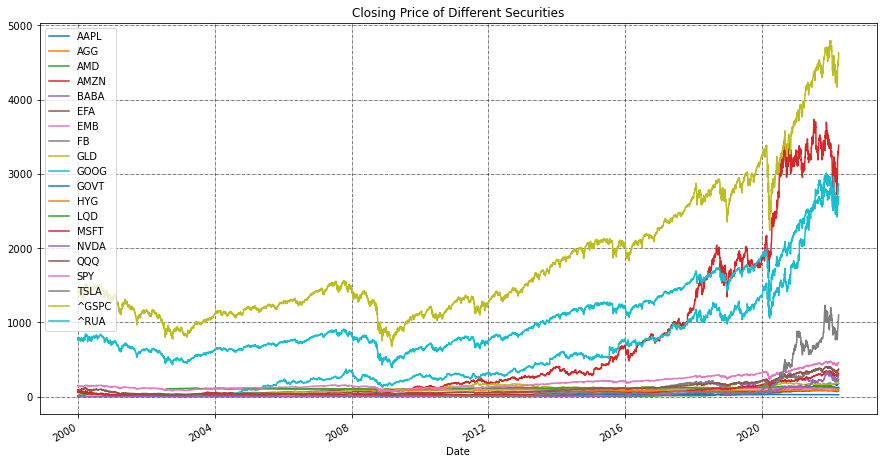

In [26]:
# Plot all the closing prices
df_close_price.plot(x='Date', y=['AAPL','AGG','AMD','AMZN','BABA','EFA','EMB','FB','GLD','GOOG','GOVT','HYG','LQD',
                                'MSFT','NVDA','QQQ','SPY','TSLA','^GSPC','^RUA']
                    , kind='line', figsize=(15, 8), title = 'Closing Price of Different Securities')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

**Insight:** From the above chart, it's quite clear that ^GSPC (S&P500), AMZN (Amazon), GOOG (Google), ^RUA (Russell 3000) and FB (Facebook) respectively have seen significant upward movement in their closing prices, which might indicate their large influence on the security market as a whole.

#### A.2. Volume Data

In [27]:
# Get Volume Data
df_2[df_2.Feature == 'Volume']

,Date,Feature,AAPL,AGG,AMD,AMZN,BABA,EFA,EMB,FB,...,GOVT,HYG,LQD,MSFT,NVDA,QQQ,SPY,TSLA,^GSPC,^RUA
5,1999-12-31,Volume,163811200.0,NaN,1765600.0,7270700.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12517600.0,12734400.0,14464400.0,3172700.0,NaN,3.740500e+08,0.0
11,2000-01-03,Volume,535796800.0,NaN,7843200.0,16117600.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,53228400.0,30091200.0,36345200.0,8164300.0,NaN,9.318000e+08,0.0
17,2000-01-04,Volume,512377600.0,NaN,6290200.0,17487400.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,54119000.0,30048000.0,33786600.0,8089800.0,NaN,1.009000e+09,0.0
23,2000-01-05,Volume,778321600.0,NaN,8204600.0,38457400.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,64059600.0,18835200.0,42496600.0,12177900.0,NaN,1.085500e+09,0.0
29,2000-01-06,Volume,767972800.0,NaN,11489400.0,18752000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,54976600.0,12048000.0,37134800.0,6227200.0,NaN,1.092300e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33557,2022-03-23,Volume,98062700.0,9060700.0,90579200.0,2790600.0,81605700.0,22375800.0,6127700.0,23717300.0,...,12087900.0,36294900.0,16949300.0,25715400.0,50212000.0,70615500.0,79426100.0,40225400.0,4.014360e+09,0.0
33563,2022-03-24,Volume,90131400.0,7480500.0,121961300.0,2839900.0,55850200.0,22098200.0,6757200.0,31502300.0,...,26676200.0,18435800.0,20466500.0,24484500.0,87737900.0,53555300.0,64736900.0,22973600.0,3.573430e+09,0.0
33569,2022-03-25,Volume,80470700.0,10538700.0,95806000.0,2451600.0,42363700.0,18372100.0,4222800.0,40010500.0,...,9688300.0,36497500.0,23247400.0,22550600.0,57847200.0,57509000.0,77026100.0,20642900.0,3.577520e+09,0.0
33575,2022-03-28,Volume,90371900.0,8540500.0,92966100.0,2992700.0,30168000.0,24829900.0,8095700.0,26224100.0,...,4313800.0,26886100.0,18691100.0,29578200.0,42549400.0,56833900.0,68529800.0,34168700.0,3.696850e+09,0.0


In [28]:
# Store Volume Data in a new Dataframe
df_volume = df_2[df_2.Feature == 'Volume']

In [29]:
df_volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5597 entries, 5 to 33581
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     5597 non-null   datetime64[ns]
 1   Feature  5597 non-null   object        
 2   AAPL     5597 non-null   float64       
 3   AGG      4658 non-null   float64       
 4   AMD      5597 non-null   float64       
 5   AMZN     5597 non-null   float64       
 6   BABA     1895 non-null   float64       
 7   EFA      5180 non-null   float64       
 8   EMB      3594 non-null   float64       
 9   FB       2482 non-null   float64       
 10  GLD      4370 non-null   float64       
 11  GOOG     4434 non-null   float64       
 12  GOVT     2541 non-null   float64       
 13  HYG      3770 non-null   float64       
 14  LQD      4952 non-null   float64       
 15  MSFT     5597 non-null   float64       
 16  NVDA     5597 non-null   float64       
 17  QQQ      5597 non-null   float64

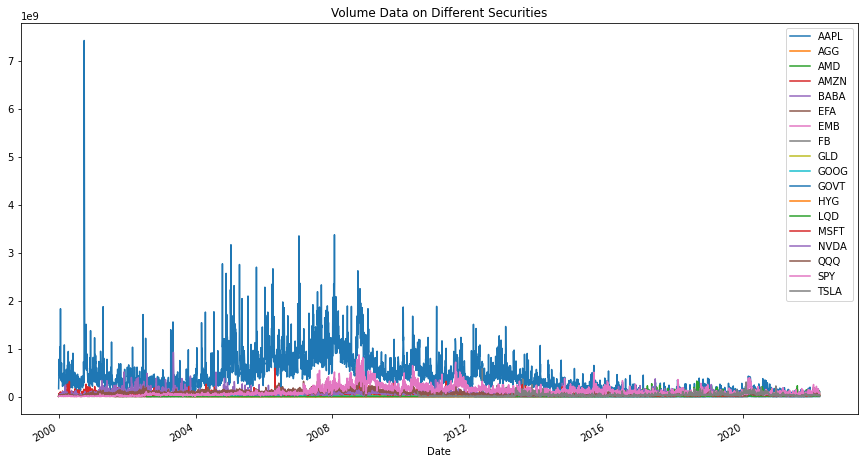

In [30]:
# Only select stocks here since S&P500 and Russell 3000 are market index
df_volume.plot(x="Date", y=['AAPL','AGG','AMD','AMZN','BABA','EFA','EMB','FB','GLD','GOOG','GOVT','HYG','LQD',
                                'MSFT','NVDA','QQQ','SPY','TSLA'], kind="line", figsize=(15, 8), title = 'Volume Data on Different Securities')
plt.show()

**Insight:** It is noticeable that 'AAPL'(Apple) and 'SPY'(SPDR S&P 500 ETF Trust) are the most traded securities in the last 22 years. The high trading volume of Apple, especially between 2005 and 2010, also correlated with the booming growth of iPhone and the MacOS ecosystem, which largely reflected positivity from investors' expectation.

#### A.3. Correlation Matrix

In order to build an optimal portfolio of different securities, it's essential to examine the correlation relationship
among a variety of stocks to increase the effects of diversification strategy.

In [31]:
# Build correlation matrix
corr_df = df_close_price.corr(method='pearson')
corr_df.head(10)

,AAPL,AGG,AMD,AMZN,BABA,EFA,EMB,FB,GLD,GOOG,GOVT,HYG,LQD,MSFT,NVDA,QQQ,SPY,TSLA,^GSPC,^RUA
AAPL,1.000000,0.715729,0.848008,0.965564,0.555582,0.526851,0.206595,0.897859,0.649067,0.975172,0.640444,-0.194395,0.796067,0.977550,0.951706,0.976453,0.951215,0.941398,0.951369,0.950915
AGG,0.715729,1.000000,0.442086,0.700737,0.518034,0.194535,0.676614,0.547680,0.858399,0.668627,0.945013,-0.123146,0.915153,0.649172,0.542560,0.726765,0.703399,0.554586,0.703203,0.708579
AMD,0.848008,0.442086,1.000000,0.812321,0.536977,0.432091,0.075917,0.867749,0.390343,0.854370,0.650449,-0.144931,0.612825,0.899539,0.915058,0.829014,0.764379,0.948029,0.764634,0.751944
AMZN,0.965564,0.700737,0.812321,1.000000,0.752584,0.504274,0.196293,0.952357,0.608285,0.960227,0.668024,-0.252231,0.792561,0.971098,0.907579,0.976115,0.956202,0.826905,0.956336,0.954073
BABA,0.555582,0.518034,0.536977,0.752584,1.000000,0.470330,0.118773,0.707906,0.685596,0.504023,0.522884,-0.028462,0.638680,0.596953,0.457241,0.624704,0.601985,0.368269,0.602198,0.603486
EFA,0.526851,0.194535,0.432091,0.504274,0.470330,1.000000,0.411493,0.726758,0.075579,0.527842,0.159279,0.579686,0.399144,0.497796,0.482740,0.569272,0.646901,0.691561,0.647109,0.654479
EMB,0.206595,0.676614,0.075917,0.196293,0.118773,0.411493,1.000000,-0.232211,0.544558,0.215051,-0.025904,0.607379,0.705188,0.149084,0.090102,0.255610,0.325596,-0.159193,0.325042,0.333720
FB,0.897859,0.547680,0.867749,0.952357,0.707906,0.726758,-0.232211,1.000000,0.503297,0.937123,0.621372,-0.487649,0.741776,0.929098,0.872133,0.957807,0.963573,0.781922,0.963634,0.963494
GLD,0.649067,0.858399,0.390343,0.608285,0.685596,0.075579,0.544558,0.503297,1.000000,0.600276,0.647342,-0.096341,0.710854,0.570312,0.518022,0.624553,0.573752,0.564209,0.573590,0.580150
GOOG,0.975172,0.668627,0.854370,0.960227,0.504023,0.527842,0.215051,0.937123,0.600276,1.000000,0.548969,-0.196240,0.772158,0.976556,0.946546,0.989210,0.977173,0.901398,0.977299,0.976528


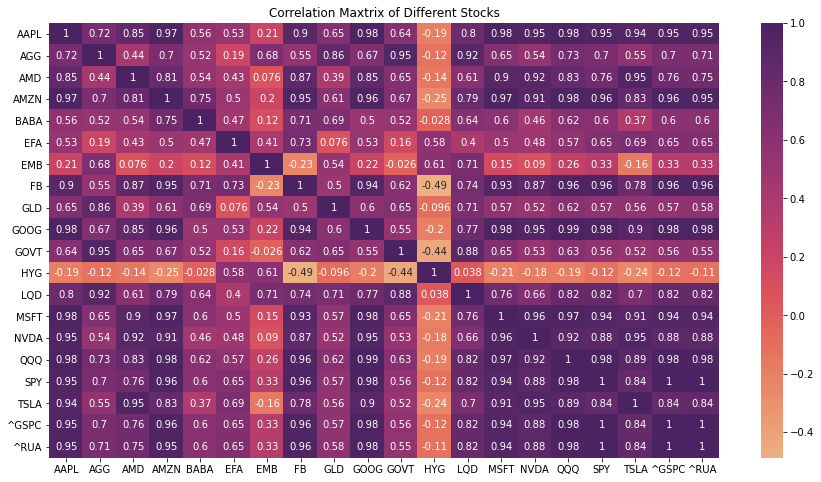

In [32]:
# Visualize our correlation results
plt.figure(figsize=(15,8))
sns.heatmap(corr_df, annot=True, cmap='flare')
plt.title('Correlation Maxtrix of Different Stocks')
plt.show()

**Insights:**
- HYG (i.e. 'ishare iboxx' ETF Fund) has negative correlations with the majority of the stocks. This is a security that tracks the investment results of an index composed of U.S dollar-denominated corporate bonds. This trend shows that over the last 20 years, certain stocks (particularly in the tech sector) are viewed much more favorably than general index, corporate bonds
- Tesla (TSLA), Microsoft (MSFT), Amazon (AMZN) and Google (GOOG) have a significant, positive correlation with general market indexes such as S&P 500 and Russell 3000 
- In order to better diversify exisiting portfolios, it is advisable that we allocate our investment in securities that are less correlated to reduce the overall risk of the porfolios and funds.

### B. ARIMA Model

### 1. Data Preparation

Since we are examining the movement in prices of different stocks, I would build a machine learning model that would train on historical data and try to predict prices in the future for the stock market. As our dataset is a largely a time-series, I would implement the ARIMA model for stock prediction. 

ARIMA (or AutoRegressive Integrated Moving Average) is a popular machine learning model that is used for time series prediction.
* Auto Regressive: means that the model uses the dependent relationship between an observation and some predefined number of lagged observations (also known as “time lag” or “lag”)
* Integrated: means that the model employs differencing of raw, time series observations
* Moving Average: means that the model exploits the relationship between the residual error and the observations.

In [33]:
# Install pmdarima
!pip install pmdarima

In [34]:
# Load all the required module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

**Assumption:** I would use MSFT Closing Price for the model preparation and building.

In [35]:
# Choose MSFT for the model
MSFT = df_close_price[['Date', 'MSFT']]
MSFT.head()

,Date,MSFT
1,1999-12-31,58.37500
7,2000-01-03,58.28125
13,2000-01-04,56.31250
19,2000-01-05,56.90625
25,2000-01-06,55.00000


In [36]:
# Reset index for MSFT DataFrame
MSFT.set_index('Date')

,MSFT
Date,
1999-12-31,58.375000
2000-01-03,58.281250
2000-01-04,56.312500
2000-01-05,56.906250
2000-01-06,55.000000
...,...
2022-03-23,299.489990
2022-03-24,304.100006
2022-03-25,303.679993


In [37]:
# Divide the dataset into 70:30 ratio
train_data, test_data = MSFT[0:int(len(MSFT)*0.7)], MSFT[int(len(MSFT)*0.7):]

In [38]:
# Show the first 5 rows of train data
train_data.head()

,Date,MSFT
1,1999-12-31,58.37500
7,2000-01-03,58.28125
13,2000-01-04,56.31250
19,2000-01-05,56.90625
25,2000-01-06,55.00000


In [39]:
# Show the first 5 rows of test data
test_data.head()

,Date,MSFT
23503,2015-07-29,46.290001
23509,2015-07-30,46.880001
23515,2015-07-31,46.700001
23521,2015-08-03,46.810001
23527,2015-08-04,47.540001


In [40]:
# Show the last 5 rows of test data
test_data.tail()

,Date,MSFT
33553,2022-03-23,299.489990
33559,2022-03-24,304.100006
33565,2022-03-25,303.679993
33571,2022-03-28,310.700012
33577,2022-03-29,315.410004


In [41]:
# Reset index on test data
test_data.set_index('Date')

,MSFT
Date,
2015-07-29,46.290001
2015-07-30,46.880001
2015-07-31,46.700001
2015-08-03,46.810001
2015-08-04,47.540001
...,...
2022-03-23,299.489990
2022-03-24,304.100006
2022-03-25,303.679993


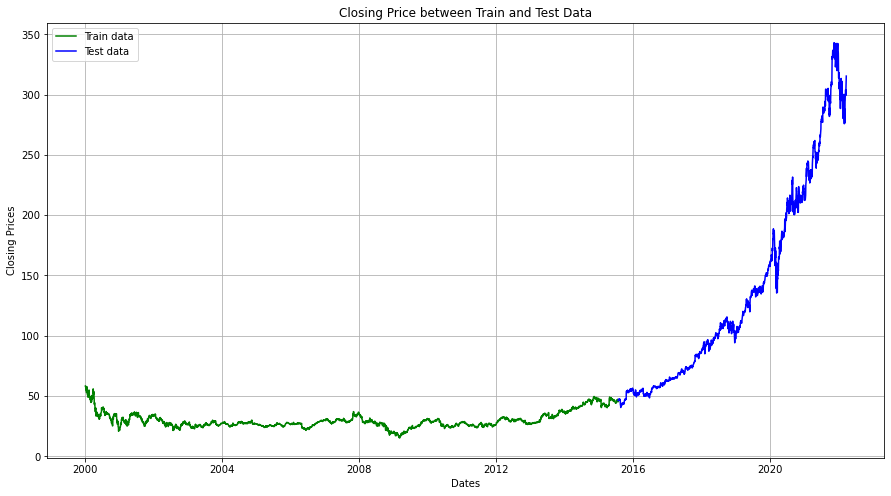

In [42]:
# Visualize result
plt.figure(figsize=(15,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data['Date'], train_data['MSFT'],'green', label='Train data')
plt.plot(test_data['Date'], test_data['MSFT'], 'blue', label='Test data')
plt.title('Closing Price between Train and Test Data')
plt.legend()

**Observation:** Train data is between 31-12-1999 and 28-07-2015 while test data is from 29-07-2015 to 29-93-2022

In [43]:
# Get only values for training and test data
training_data = train_data['MSFT'].values
test_data = test_data['MSFT'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

# Build and fit model on the training & test data
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

**Notes:** We have split the training and test data based on ratio 70:30, which are later used to fit into our ARIMA model. Each element on the test set would then generate a prediction and would be compared with the actual MSFT stock price to see how our model performs. 

In [44]:
# Get MSE error
MSE_error = mean_squared_error(test_data, model_predictions)
print('Mean Squared Error is {} for testing data'.format(MSE_error))

Mean Squared Error is 7.799528036659073 for testing data


**Insight:** The Mean Squared Error (MSE) is used to measure how accurately our ML model is able to predict an expected outcome (i.e. our stock prices). With MSE, the lower the result, the better. Our MSQE is almost 7.8, denoting that our model precision is relatively high. We should also use our model with precautions since low MSE might also indicate an overfitting problem, in which case we would need to use cross-validation and other models to evaluate the best performing ML model.

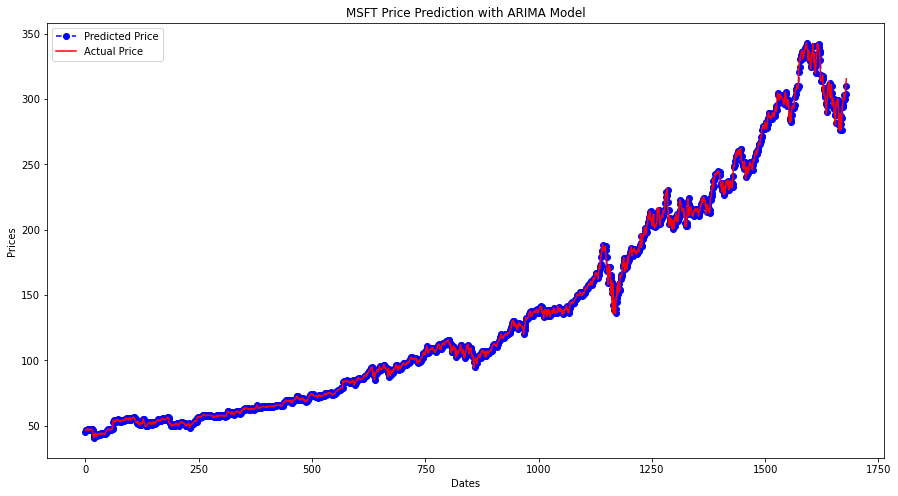

In [45]:
# Visualize ARIMA results vs actual stock price
plt.figure(figsize=(15,8))
plt.plot(model_predictions, color='blue', label='Predicted Price', marker='o', linestyle='dashed')
plt.plot(test_data, color='red', label='Actual Price')

plt.title('MSFT Price Prediction with ARIMA Model')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

**Insights:** Our ARIMA model results in fairly good results in comparison to our actual prices. This model offers a decent prediction accuracy. For further considerations, I would want to build additional model of Long short-term memory (LSTM) to better compare the advantages and disadvantages of each ML models.

**References:**
1. https://www.linkedin.com/pulse/intro-portfolio-skewness-jonathan-regenstein
2. https://www.linkedin.com/pulse/intro-portfoliokurtosis-jonathan-regenstein?trk=pulse-article
3. https://www.ishares.com/us/literature/fact-sheet/hyg-ishares-iboxx-high-yield-corporate-bond-etf-fund-fact-sheet-en-us.pdf